Berikut 

In [1]:
import pandas as pd

In [2]:
#buka file
raw_data = pd.read_json("/content/drive/MyDrive/laporhendi.json", lines=True)

#menampilkan file
raw_data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1211515148235497477,1211515148235497472,2019-12-30 05:11:34,2019-12-30,05:11:34,UTC,94952923,rizaranugraha,albert,,#laporhendi Pak @hendrarprihadi ijin bertanya ...,[hendrarprihadi],[],[],1,0,0,[#laporhendi],[],https://twitter.com/rizaranugraha/status/12115...,False,,0,,,,,,,"[{'user_id': '94952923', 'username': 'rizaranu...",,,,
1,1211287545385897986,1211287545385897984,2019-12-29 14:07:10,2019-12-29,14:07:10,UTC,1172663050999984128,abdulhakimarr,Dulll,,#laporhendi \nNyuwun tulung pak mbok di damelk...,[hendrarprihadi],[],[https://pbs.twimg.com/media/EM9blswVUAES2ee.jpg],1,0,4,[#laporhendi],[],https://twitter.com/Abdulhakimarr/status/12112...,False,,0,,,,,,,"[{'user_id': '1172663050999984128', 'username'...",,,,
2,1210958010232651777,1210958010232651776,2019-12-28 16:17:42,2019-12-28,16:17:42,UTC,2949162048,febykawul,#ReuniF.13,,slogan #SemarangHebat tidak terlihat di jam2 m...,[hendrarprihadi],[],[],1,0,0,"[#semaranghebat, #laporhendi]",[],https://twitter.com/febykawul/status/121095801...,False,,0,,,,,,,"[{'user_id': '2949162048', 'username': 'febyka...",,,,
3,1210582912413786112,1210582912413786112,2019-12-27 15:27:12,2019-12-27,15:27:12,UTC,841071379,salomolianggada,Salomo Lianggada,,@P3Mkotasmg Lapor jalan di depan Pasar Pedurun...,[p3mkotasmg],[],[],1,0,0,[#laporhendi],[],https://twitter.com/SalomoLianggada/status/121...,False,,0,,,,,,,"[{'user_id': '841071379', 'username': 'SalomoL...",,,,
4,1210573397068898304,1210573397068898304,2019-12-27 14:49:23,2019-12-27,14:49:23,UTC,1734718004,umihanif2,#AktivisSakitJiwa,,@pln_123 daerah Purwosari Semarang Utara sdh d...,"[pln_123, hendrarprihadi, ganjarpranowo]",[],[],0,0,0,[#laporhendi],[],https://twitter.com/umihanif2/status/121057339...,False,,0,,,,,,,"[{'user_id': '1734718004', 'username': 'umihan...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1080663991297265664,1080663991297265664,2019-01-03 03:15:47,2019-01-03,03:15:47,UTC,1036164145,budiutomo920,Budhy Utomo,,@P3Mkotasmg \nSekedar menyalurkan keluh kesah ...,"[p3mkotasmg, hendrarprihadi]",[https://www.facebook.com/groups/MIKSEMAR/perm...,[https://pbs.twimg.com/media/Dv9KJoHV4AIX1II.j...,1,0,0,[#laporhendi],[],https://twitter.com/budiutomo920/status/108066...,False,,0,,,,,,,"[{'user_id': '1036164145', 'username': 'budiut...",,,,
1271,1080509960717385728,1080509960717385728,2019-01-02 17:03:44,2019-01-02,17:03:44,UTC,2511620455,ikilhogenuk,Iki Lho Genuk Semarang,,Ndan @disperkim_smg mohon pantauannya pas mala...,[disperkim_smg],[],[],1,0,3,[#laporhendi],[],https://twitter.com/IkiLhoGenuk/status/1080509...,False,,0,,,,,,,"[{'user_id': '2511620455', 'username': 'IkiLho...",,,,
1272,1080478764641832960,1080478764641832960,2019-01-02 14:59:46,2019-01-02,14:59:46,UTC,920282848359202817,miksemar_info,MIK Semar Info,,Informasi untuk @disperkim_smg @P3Mkotasmg @Pe...,"[disperkim_smg, p3mkotasmg, pemkotsemarang, pr...",[],[https://pbs.twimg.com/media/Dv6hq8LU8AE7QS2.j...,1,0,0,"[#laporhendi, #kemalajateng]",[],https://twitter.com/MikSemar_Info/status/10804...,False,,0,,,,,,,"[{'user_id': '920282848359202817', 'username':...",,,,
1273,1080154594745843712,1074677605742174208,2019-01-01 17:31:38,2019-01-01,17:31:38,UTC,4147570092,fenitafefe,Fefe.Fenita,,@PemkotSemarang\n@disperkim_smg @hendrarprihad...,"[pemkotsemarang, disperkim_smg, hendrarprihadi]",[],[],1,0,0,[#laporhendi],[],https://twitter.com/FenitaFefe/status/10801545...,False,,0,,,,,,,"[{'user_id': '4147570092', 'username': 'Fenita...",,,,


In [3]:
#menduplikasi file json ke variabel yang baru
twt = raw_data.copy()

#menampilkan info tipe data tabel
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1275 non-null   int64         
 1   conversation_id  1275 non-null   int64         
 2   created_at       1275 non-null   datetime64[ns]
 3   date             1275 non-null   datetime64[ns]
 4   time             1275 non-null   object        
 5   timezone         1275 non-null   object        
 6   user_id          1275 non-null   int64         
 7   username         1275 non-null   object        
 8   name             1275 non-null   object        
 9   place            1275 non-null   object        
 10  tweet            1275 non-null   object        
 11  mentions         1275 non-null   object        
 12  urls             1275 non-null   object        
 13  photos           1275 non-null   object        
 14  replies_count    1275 non-null   int64  

Pertama saya ingin menampilkan jumlah cuitan di tiap bulannya

In [4]:
#mengubah file datetime menjadi nama bulan
twt['months'] = twt['date'].dt.month_name()

#menampilkan nama bulan
twt['months'].unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January'],
      dtype=object)

In [5]:
#menampilkan jumlah twit per bulan
twt['months'].value_counts()

June         172
February     148
March        125
July         115
November     107
October      102
January      100
September     95
December      88
April         78
August        74
May           71
Name: months, dtype: int64

In [6]:
#buka library untuk membuat plot atau grafik
import matplotlib.pyplot as plt
import seaborn as sns

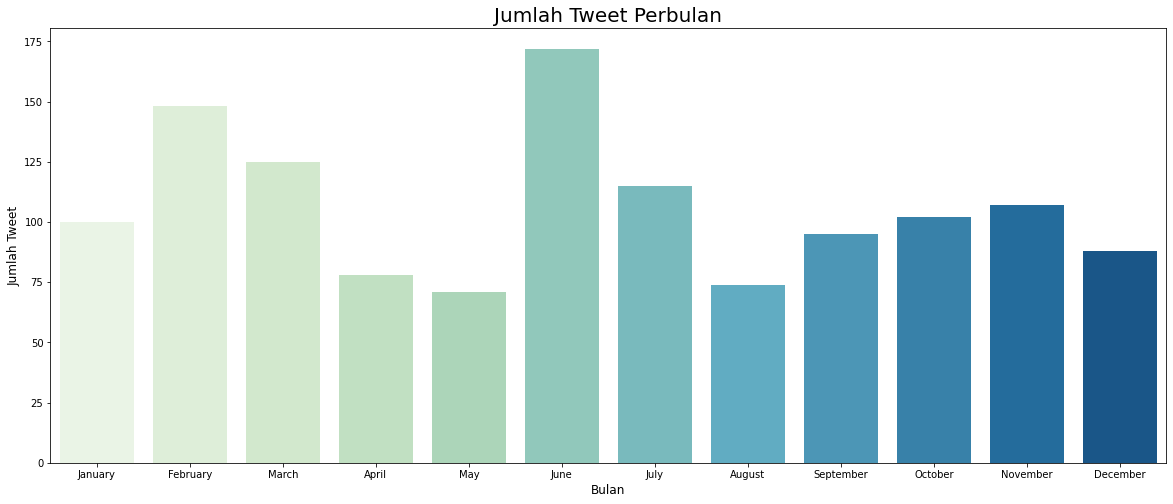

In [7]:
#menampilkan dalam bentuk grafik
plt.figure(figsize=(20, 8))

#karena data sebelumnya berurutkan berdasar yang paling banyak cuitannya, disini saya urutkan berdasarkan urutan bulan
bulan = sns.countplot(x='months', data=twt, palette="GnBu",
              order=["January", "February", "March", "April", "May", "June","July", "August", "September", "October",  "November",  "December"])
bulan.set_xlabel('Bulan', fontsize = 12)
bulan.set_ylabel('Jumlah Tweet', fontsize = 12)
bulan.set_title("Jumlah Tweet Perbulan", fontsize = 20)
bulan

Kedua saya mau menampilkan jumlah cuitan perjam di setiap harinya

In [8]:
#mengubah file datetime menjadi jam
def ambiljam(jam):
  return jam[:2]
twt['hour'] = twt['time'].apply(lambda x:ambiljam(x))
twt['hour'].unique()

array(['05', '14', '16', '15', '04', '07', '11', '08', '10', '01', '02',
       '00', '12', '09', '13', '06', '22', '23', '03', '19', '18', '17',
       '20', '21'], dtype=object)

In [9]:
#mengubah data datetime menjadi nama hari
twt['days'] = twt['created_at'].dt.day_name()
twt['days'].unique()

array(['Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [10]:
#mengisi tiap isi cuitan bernilai 1
twt['ntwit'] = 1
twt['ntwit']

0       1
1       1
2       1
3       1
4       1
       ..
1270    1
1271    1
1272    1
1273    1
1274    1
Name: ntwit, Length: 1275, dtype: int64

In [11]:
#Membuat table pivot sebagai dasar untuk membuat heatmap
twthi = twt.pivot_table(index='days', columns='hour', values='ntwit', aggfunc='sum')
twthi.index = pd.CategoricalIndex(twthi.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
twthi.sort_index(level=0, inplace=True)
twthi

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
days,,,,,,,,,,,,,,,,,,,,,,,,
Monday,3.0,10.0,16.0,19.0,14.0,15.0,13.0,12.0,10.0,7.0,14.0,7.0,12.0,6.0,7.0,6.0,4.0,7.0,3.0,2.0,1.0,NaN,2.0,5.0
Tuesday,9.0,7.0,12.0,19.0,16.0,8.0,12.0,9.0,25.0,12.0,15.0,18.0,10.0,14.0,8.0,20.0,6.0,4.0,NaN,2.0,NaN,1.0,5.0,4.0
Wednesday,6.0,10.0,8.0,14.0,20.0,6.0,10.0,7.0,5.0,7.0,10.0,14.0,5.0,5.0,4.0,10.0,3.0,2.0,2.0,2.0,NaN,3.0,4.0,4.0
Thursday,12.0,17.0,18.0,15.0,10.0,8.0,5.0,7.0,10.0,13.0,9.0,14.0,4.0,5.0,9.0,5.0,2.0,1.0,1.0,3.0,NaN,NaN,3.0,6.0
Friday,10.0,12.0,17.0,13.0,19.0,10.0,12.0,16.0,13.0,17.0,6.0,11.0,13.0,9.0,10.0,10.0,3.0,3.0,3.0,1.0,3.0,1.0,6.0,5.0
Saturday,7.0,6.0,12.0,8.0,8.0,6.0,5.0,5.0,6.0,6.0,10.0,12.0,12.0,4.0,6.0,6.0,6.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0
Sunday,8.0,7.0,14.0,9.0,8.0,8.0,2.0,3.0,4.0,6.0,12.0,5.0,10.0,8.0,5.0,7.0,10.0,3.0,1.0,2.0,NaN,1.0,2.0,3.0


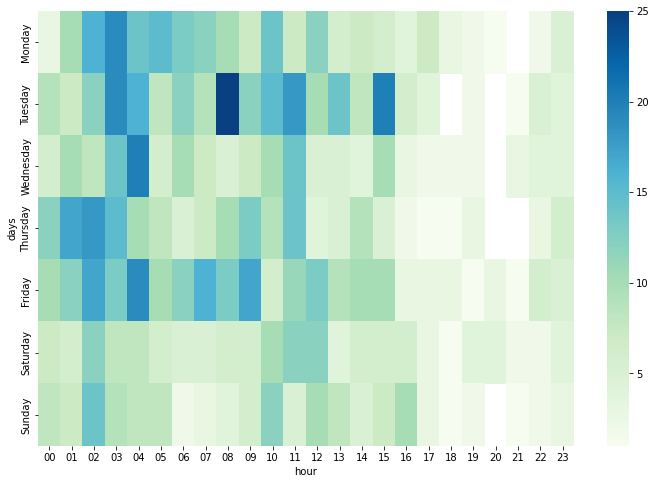

In [12]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(twthi, cmap='GnBu')

In [13]:
#banyaknya pengguna yang ngetwit
print(len(twt['username'].unique()))

602


In [14]:
#menghitung user paling banyak yang ngtweet
usertwt = twt['username'].value_counts()[0:10]
usertwt

miksemar_info     79
kristantiayu_     36
yohana_resp       33
fachrianantyo     32
gusbs             23
akuya_aikya       17
sepurnomo11       11
moegi33           11
agungherry72      10
hendrarprihadi    10
Name: username, dtype: int64

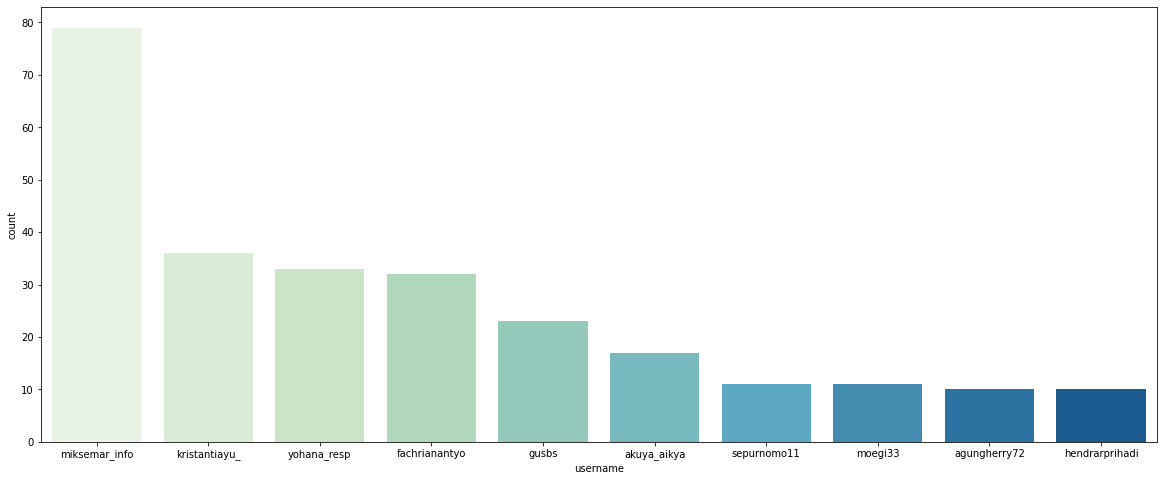

In [15]:
plt.figure(figsize=(20, 8))
userh = sns.countplot(palette="GnBu", x = 'username', data = twt, order = twt['username'].value_counts().index[0:10])


In [16]:
#print(len(twt['mentions']))
#mention = twt['mentions'].value_counts()[0:10]
#mention

In [17]:
from itertools import combinations
from collections import Counter

In [18]:
w = dict(Counter(twt['mentions'].sum()).most_common(10))
w

{'dishubkotasmg': 79,
 'disperkim_smg': 64,
 'ganjarpranowo': 155,
 'hendrarprihadi': 957,
 'p3mkotasmg': 382,
 'pdamkotasmg': 125,
 'pemkotsemarang': 45,
 'pemkotsmg': 60,
 'pln_123': 61,
 'pu_kotasemarang': 47}

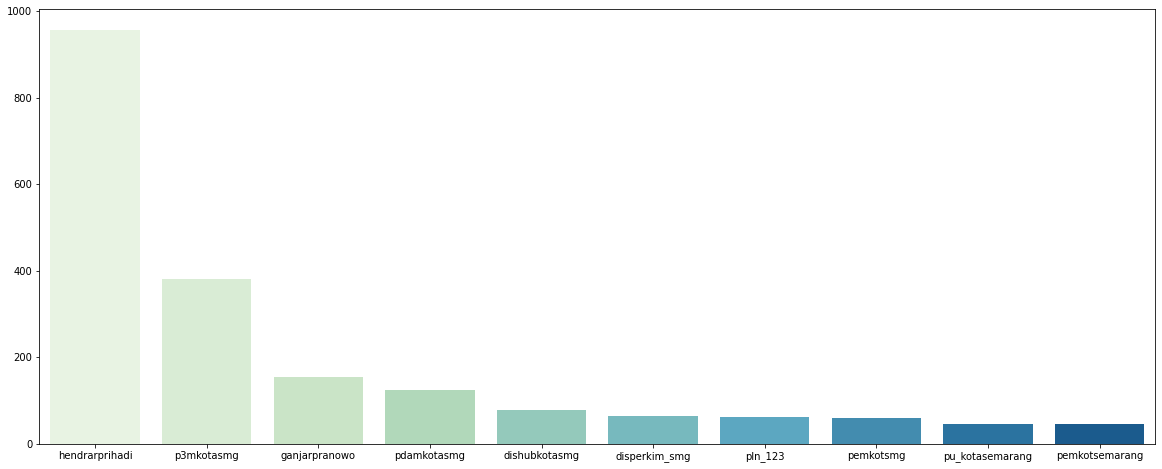

In [20]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(w.keys()), y=list(w.values()), palette='GnBu')

In [59]:
pd.options.display.max_colwidth=150
twtb = twt[['username', 'tweet']]
twtb[twtb.username == 'miksemar_info'].head()

,username,tweet
17,miksemar_info,Informasi untuk @disperkim_smg lampu PJU di jl. Soekarno Hatta padam sudah 4 hari.\n#LaporHendi \nCc @P3Mkotasmg pic.twitter.com/JXTIx1llVF
63,miksemar_info,"Informasi untuk @disperkim_smg @pln_123 ada pohon di jl. Pancur sari raya, kel. Jangli, kec. Tembalang, kota Semarang yang sudah menyentuh kabel P..."
67,miksemar_info,Informasi untuk @Dishubkotasmg lampu APILL di arteri yos sudarso arah tanah mas tidak berfungsi.\n#LaporHendi cc @P3Mkotasmg pic.twitter.com/eSD4b...
78,miksemar_info,Menginformasikan kepada @DLHKOTASEMARANG tentang kondisi kali di jl. Mayjen sutoyo yg sudah dipenuhi sampah.\nCc @P3Mkotasmg #LaporHendi pic.twit...
85,miksemar_info,"Informasi untuk @damkar_semarang ada sarang tawon yang cukup besar di kebun binatang ""semarang zoo"", diatas kandang buaya.\n#LaporHendi cc @P3Mkot..."


In [22]:
twta = twt[['username', 'tweet', 'months']]
twta = twta[twta['months']=='June']
twta.head()

,username,tweet,months
581,masraden_andang,"Terima kasih,,matur nuwun sanget bapak walikota semarang.mohon ijin bapak untuk perempatan krapyak,,dibawah bangjo yang dari arah sugriwo sering semrawut karena dijadikan pangkalan/tongkrongan taksi.bikin tambah macet pak wali..nuwun #laporhendi",June
582,wilyzyunanto,"@hendrarprihadi @P3Mkotasmg mohon perbaikan jalan di antara jl dewi sartika dan kalialang...ada jalan -+200m rusak dan sering terjadi kebocoran pipa @PDAMKotaSMG yg smkn menambah kerusakan jln,spt skrg ada kebocoran pipa...mohon perbaikan pak @hendrarprihadi #Laporhendi pic.twitter.com/d8ZOFgEQa3",June
583,apriantorizal,"Ngapunten pak, wingi niko sanes saluran irigasi, ingkang leres saluran drainase. (salah ketik)\nMeniko foto enjing wau njih pak.\n(30 juni 2019)\n\nMatur suwun 🙏\n#LaporHendi pic.twitter.com/YBZVQKJLFs",June
584,corneliamoon11,"jalan gajah raya diperlebar, banyak bis bis pariwisata ke majt padahal jalane sempit #laporhendi",June
585,hahananto,"Sepanjang jalan pedurungan sampe mau masuk tol gayamsari aspal jalannya sudah pada ngeluntung pak, berasa goyang goyang kalo naik motor, bahaya. #LaporHendi",June


Clean tweet berdasarkan https://gist.github.com/gracecarrillo/53ab0c64121514abe02a74e483fd29ce/revisions

In [23]:
import re
import string

In [24]:
# cleaning helper function
def processTweet(tweet):
    """
    Takes in a string of text, then performs the following:
    1. Removes links, special characters and other bulk cleaning
    2. Returns a list of the tidy text
    """
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    #tambahan
    tweet = re.sub(r'pic.twitter.com/', '', tweet)
    tweet = re.sub(r'\n', '', tweet)
    tweet = re.sub(r'…', '', tweet)
    return tweet


In [25]:
# clean dataframe's text column
twt['procs'] = twt['tweet'].apply(processTweet)
# preview some cleaned tweets
twt['procs']

0                        pak ijin bertanya norma waktu permintaan surat keterangan pindah wni antar provinsi berapa lama? karena petugas ktp kecamatan gayamsari mengatakan min hari kerja. menurut saya terlalu lama pak krn domisili saya bukan semarang.
1       nyuwun tulung pak mbok damelke lapangan sepak bola deket rusun baru kelurahan sawah besar soale dulu disitu lapangan bolanya menjadi pusat kegiatan olahraga warga pak tapi sekarang udah ndak ada tempat buat olah raga suwun suwun pak hjjlxzsqpx
2                                                           slogan tidak terlihat jam2 malam seperti nya pak kemarin terjadi pembacokan jln arteri soekarno hatta, dan kejadian jln itu tidak terjadi sekali . mohon pengawasan untuk jajaran bpk walikota 
3                                                                                                                           lapor jalan depan pasar pedurungan ada yang pecah sudah lama tidak diperbaiki dan sangat berbahaya dan mengganggu lalu l

In [28]:
#!pip3 install git+https://github.com/sastrawi/sastrawi
!pip3 install sastrawi

     |████████████████████████████████| 209 kB 29.5 MB/s 


In [29]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stop_factory = StopWordRemoverFactory()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#more_stopword = [‘dengan’, ‘ia’,’bahwa’,’oleh’]
data = stop_factory.get_stop_words()#+more_stopword
#stopword = stop_factory.create_stop_word_remover()
#print(data)

In [30]:
# tokenize helper function
def text_process(tweet):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(tweet) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stop_factory.get_stop_words()]

In [31]:
# Lexicon normalisation with Stemming 
def stemming(tokens):
  """
  Takes in a string of text, then performs the following:
  1. Replace words for its root based on orter Stemmer rule.
  2. Returns normalised text
   """
  #stemmer = PorterStemmer()
  x = [stemmer.stem(w) for w in tokens]

  return ' '.join(x)

In [32]:
#tokneizer
twt['txtprocs'] = twt['procs'].apply(text_process)
twt['txtprocs'].head()

0                                               [pak, ijin, bertanya, norma, waktu, permintaan, surat, keterangan, pindah, wni, antar, provinsi, berapa, lama, petugas, ktp, kecamatan, gayamsari, mengatakan, min, hari, kerja, terlalu, lama, pak, krn, domisili, bukan, semarang]
1    [nyuwun, tulung, pak, mbok, damelke, lapangan, sepak, bola, deket, rusun, baru, kelurahan, sawah, besar, soale, dulu, disitu, lapangan, bolanya, menjadi, pusat, kegiatan, olahraga, warga, pak, sekarang, udah, ndak, tempat, buat, olah, raga, suwun, suwun, pak, hjjlxzsqpx]
2                                                                                                   [slogan, terlihat, jam2, malam, nya, pak, kemarin, terjadi, pembacokan, jln, arteri, soekarno, hatta, kejadian, jln, terjadi, sekali, mohon, pengawasan, jajaran, bpk, walikota]
3                                                                                                                                                                     [la

In [35]:
q = dict(Counter(twt['txtprocs'].sum()).most_common(10))
q

{'air': 151,
 'hari': 105,
 'jalan': 277,
 'kasih': 92,
 'kota': 106,
 'lapor': 106,
 'mati': 106,
 'mohon': 236,
 'pak': 773,
 'semarang': 215}

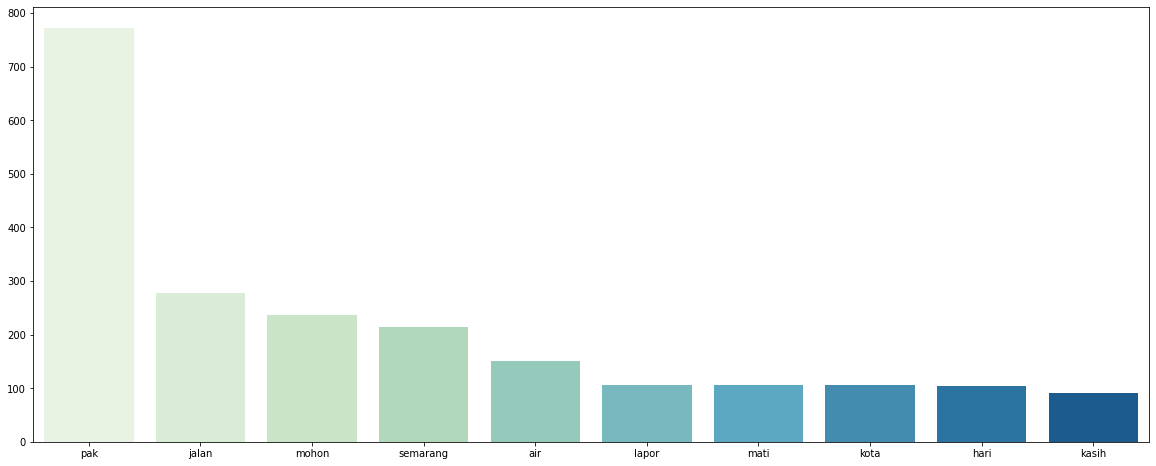

In [36]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(q.keys()), y=list(q.values()), palette='GnBu')

In [37]:
twt['twtstem'] = twt['txtprocs'].apply(stemming)
twt['twtstem'].head()

0                                            pak ijin tanya norma waktu minta surat terang pindah wni antar provinsi berapa lama tugas ktp camat gayamsari kata min hari kerja terlalu lama pak krn domisili bukan semarang
1    nyuwun tulung pak mbok damelke lapang sepak bola deket rusun baru lurah sawah besar soale dulu situ lapang bola jadi pusat giat olahraga warga pak sekarang udah ndak tempat buat olah raga suwun suwun pak hjjlxzsqpx
2                                                                                            slogan lihat jam2 malam nya pak kemarin jadi baco jln arteri soekarno hatta jadi jln jadi sekali mohon awas jajar bpk walikota
3                                                                                                                                       lapor jalan depan pasar pedurungan pecah lama baik sangat bahaya ganggu lalu lintas
4                                                                                                                       

In [38]:
#tokneizer
twt['txtprocs2'] = twt['twtstem'].apply(text_process)
twt['txtprocs2'].head()

0                                                   [pak, ijin, tanya, norma, waktu, minta, surat, terang, pindah, wni, antar, provinsi, berapa, lama, tugas, ktp, camat, gayamsari, kata, min, hari, kerja, terlalu, lama, pak, krn, domisili, bukan, semarang]
1    [nyuwun, tulung, pak, mbok, damelke, lapang, sepak, bola, deket, rusun, baru, lurah, sawah, besar, soale, dulu, situ, lapang, bola, jadi, pusat, giat, olahraga, warga, pak, sekarang, udah, ndak, tempat, buat, olah, raga, suwun, suwun, pak, hjjlxzsqpx]
2                                                                                                          [slogan, lihat, jam2, malam, nya, pak, kemarin, jadi, baco, jln, arteri, soekarno, hatta, jadi, jln, jadi, sekali, mohon, awas, jajar, bpk, walikota]
3                                                                                                                                                              [lapor, jalan, depan, pasar, pedurungan, pecah, lama, baik, sangat, ba

In [39]:
r = dict(Counter(twt['txtprocs'].sum()).most_common(10))
r

{'air': 151,
 'hari': 105,
 'jalan': 277,
 'kasih': 92,
 'kota': 106,
 'lapor': 106,
 'mati': 106,
 'mohon': 236,
 'pak': 773,
 'semarang': 215}

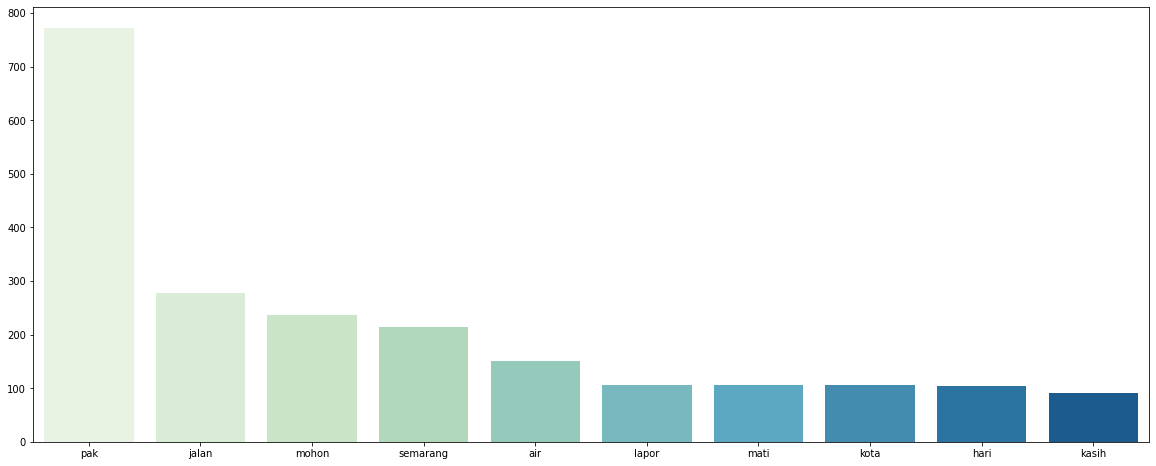

In [41]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(r.keys()), y=list(r.values()), palette='GnBu')

In [42]:
def remove_words(word_list):
    remove = ['pak','ini','...','untuk','yang','ada','…','dan', 'tidak', 'semarang', 'mohon', 'saya', 'dari', 'sudah', 'hari', 'bisa', 'lapor', 'tolong', 'apa', 'mau', 'sampai', 'depan', 'jam', 'pagi', 'terima']
    return [w for w in word_list if w not in remove]

In [46]:
twt['bersih'] = twt['txtprocs2'].apply(remove_words)
twt['bersih'].head()

0                                                              [ijin, tanya, norma, waktu, minta, surat, terang, pindah, wni, antar, provinsi, berapa, lama, tugas, ktp, camat, gayamsari, kata, min, kerja, terlalu, lama, krn, domisili, bukan]
1    [nyuwun, tulung, mbok, damelke, lapang, sepak, bola, deket, rusun, baru, lurah, sawah, besar, soale, dulu, situ, lapang, bola, jadi, pusat, giat, olahraga, warga, sekarang, udah, ndak, tempat, buat, olah, raga, suwun, suwun, hjjlxzsqpx]
2                                                                                                       [slogan, lihat, jam2, malam, nya, kemarin, jadi, baco, jln, arteri, soekarno, hatta, jadi, jln, jadi, sekali, awas, jajar, bpk, walikota]
3                                                                                                                                                             [jalan, pasar, pedurungan, pecah, lama, baik, sangat, bahaya, ganggu, lalu, lintas]
4                               

In [47]:
t = dict(Counter(twt['bersih'].sum()).most_common(10))
t

{'air': 176,
 'bantu': 83,
 'jadi': 98,
 'jalan': 305,
 'kasih': 98,
 'kota': 111,
 'lampu': 88,
 'mati': 118,
 'parkir': 105,
 'warga': 85}

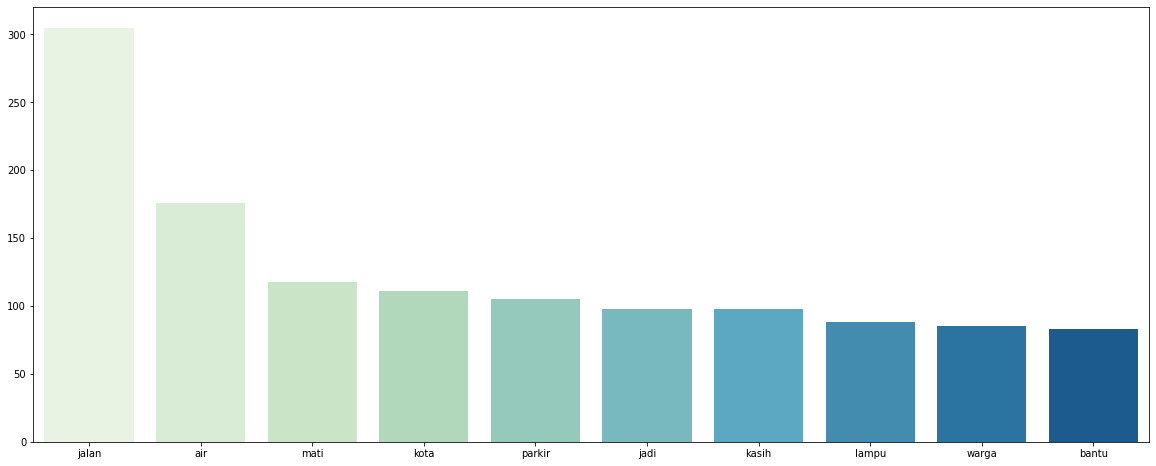

In [48]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(t.keys()), y=list(t.values()), palette='GnBu')

In [61]:
twtjalan = twt[twt["twtstem"].str.lower().str.contains("jalan")].head()
twtjalan['tweet'].head()

3     @P3Mkotasmg Lapor jalan di depan Pasar Pedurungan ada yang pecah sudah lama tidak diperbaiki dan sangat berbahaya dan mengganggu lalu lintas. #Lap...
7     Sekalian pak, lokas di jalan sebelum bangjo perempatan kaligarang (kalo dari arah kelud).\n\nCc: @hendrarprihadi @mbakITASMG @P3Mkotasmg @Dishubko...
10                       @hendrarprihadi @P3Mkotasmg #LaporHendi lampu penerang jalan di sekitar jalan Majapahit mati semua pak  pic.twitter.com/q4RAynw8UD
22                                                                                   Jalan gajah dan medoho kpn pak\nKan akses masjid agung pak #laporhendi
31    @hendrarprihadi Selamat pagi pak. Saya mohon kepada bapak, akses jalan menuju pantai tirang segera diperbaiki. Kemarin saya main ke pantai tirang,...
Name: tweet, dtype: object

In [62]:
twtjalan = twt[twt["twtstem"].str.lower().str.contains("air")].head()
twtjalan['tweet'].head()

12    #LaporHendi pak, kemarin di daerah genuk indah ada penggusuran PKL oleh satpol pp, tapi kok malah bikin saluran airnya terhambat ya, tolong disuru...
15    @P3Mkotasmg @PDAMKotaSMG @hendrarprihadi #LaporHendi mohon di bantu kembali baru 2 hari air lancar ya walaupun alirannya masih kecil hari ini seha...
23    @P3Mkotasmg @PDAMKotaSMG @hendrarprihadi #LaporHendi mohon di bantu ini sudah ada 2 hari air tdk mengalir di jl kumudasmoro tengah III, kering ker...
24                                             @PDAMKotaSMG #laporhendi @ganjarpranowo @hendrarprihadi kapan nyalanya air di sekitaran grennwood kalialang.
41    @PDAMKotaSMG  mau tanya kok ini air PDAM di Perum Bukit Cemara Residence bulusan, Tembalang dri akhir september sampai skrng kok blm mengalir ya? ...
Name: tweet, dtype: object